In [1]:
import pandas as pd
from pandas_datareader import data as web # Package and modules for importing data.S
import datetime
from pandas import DataFrame
from pandas import DatetimeIndex
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

#stock prices over the past year
start = datetime.datetime(2017,3,1)
end = datetime.date.today()

dates = pd.date_range(start=start, end=end, freq='CBM').strftime("%Y-%m-%d").tolist()
dates

Populating the interactive namespace from numpy and matplotlib


['2017-03-31',
 '2017-04-28',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-29',
 '2017-10-31',
 '2017-11-30',
 '2017-12-29',
 '2018-01-31',
 '2018-02-28']

2y
2y
2y
2y
2y
                AAPL      AMZN      BABA        FB      GOOG      MEAN
2017-03-31  1.027684  1.039223  1.036428  1.033692  0.993200  1.026045
2017-04-28  1.027613  1.084295  1.110150  1.093363  1.084670  1.080018
2017-05-31  1.092782  1.165916  1.177047  1.102169  1.155189  1.138621
2017-06-30  1.030260  1.134712  1.354287  1.098676  1.087987  1.141184
2017-07-31  1.063953  1.157898  1.489331  1.231626  1.114051  1.211372
2017-08-31  1.173188  1.149482  1.650711  1.251419  1.124623  1.269885
2017-09-29  1.102511  1.126917  1.660035  1.243414  1.148305  1.256236
2017-10-31  1.209242  1.295635  1.777105  1.310290  1.217183  1.361891
2017-11-30  1.229344  1.379413  1.702038  1.289332  1.222894  1.364604
2017-12-29  1.210602  1.370880  1.657343  1.284093  1.252814  1.355146
2018-01-31  1.197725  1.700767  1.963572  1.359991  1.400723  1.524556
2018-02-28  1.274197  1.772929  1.789120  1.297628  1.322650  1.491305


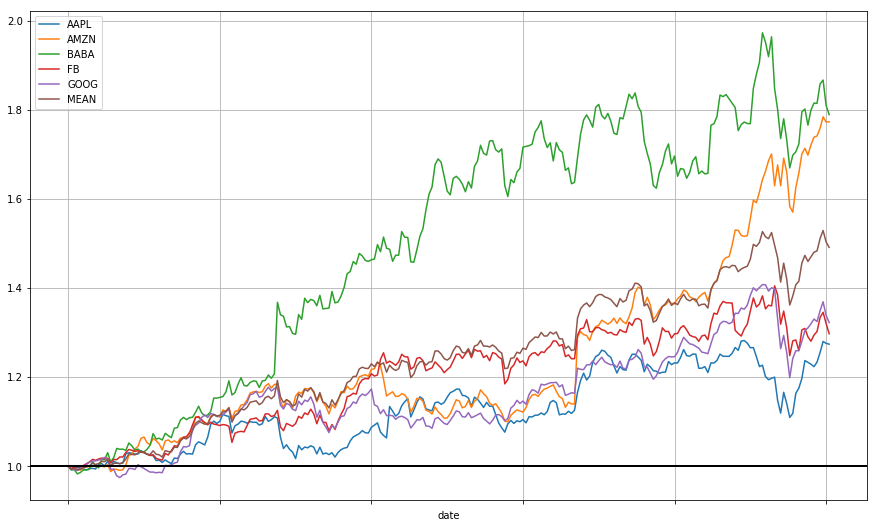

In [2]:
# GAFAA
google = web.DataReader('GOOG', 'iex', start, end)
apple = web.DataReader('AAPL', 'iex', start, end)
facebook = web.DataReader('FB', 'iex', start, end)
amazon = web.DataReader('AMZN', 'iex', start, end)
alibaba = web.DataReader('BABA', 'iex', start, end)

gafaa_stocks = pd.DataFrame({"GOOG": google["close"],
                       "AAPL": apple["close"],
                       "FB": facebook["close"],
                       "AMZN": amazon["close"],
                       "BABA": alibaba["close"]})

gafaa_stock_return = gafaa_stocks.apply(lambda x: x / x[0])
gafaa_stock_return['MEAN'] = gafaa_stock_return.mean(numeric_only=True, axis=1)
print(DataFrame(gafaa_stock_return, index=dates))
gafaa_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

2y
                 QQQ
2017-03-31  1.007152
2017-04-28  1.034617
2017-05-31  1.074939
2017-06-30  1.047170
2017-07-31  1.089699
2017-08-31  1.112295
2017-09-29  1.106589
2017-10-31  1.157562
2017-11-30  1.180386
2017-12-29  1.185027
2018-01-31  1.288801
2018-02-28  1.272139


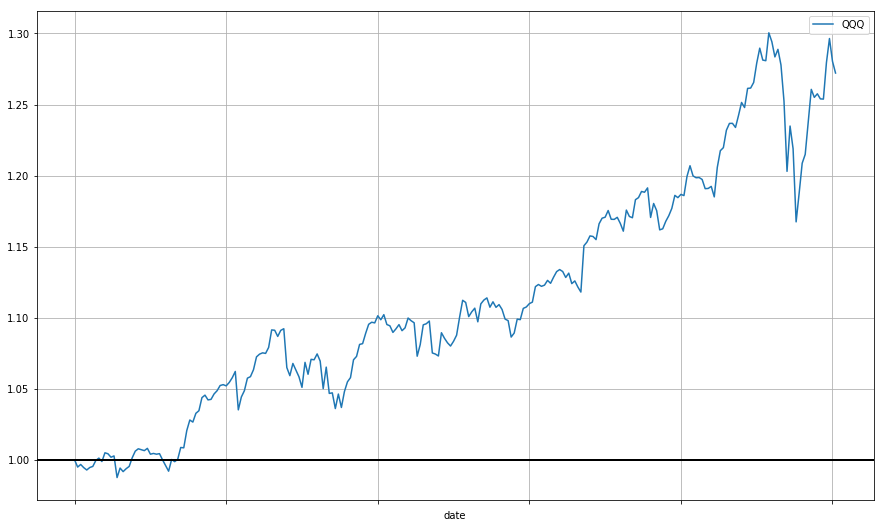

In [3]:
# index
powershares = web.DataReader('QQQ', 'iex', start, end)
#ixic = web.DataReader('^IXIC', 'iex', start, end)

inx_stocks = pd.DataFrame({#"IXIC": ixic["close"],
                          "QQQ": powershares["close"]})

inx_stock_return = inx_stocks.apply(lambda x: x / x[0])
print(DataFrame(inx_stock_return, index=dates))
inx_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

2y
2y
2y
                CRSP      EDIT      NTLA      MEAN
2017-03-31  0.968847  0.907317  0.939960  0.938708
2017-04-28  0.757454  0.766260  0.971981  0.831899
2017-05-31  0.606142  0.555285  0.764510  0.641979
2017-06-30  0.712951  0.682114  1.067378  0.820814
2017-07-31  0.778371  0.687805  1.123416  0.863197
2017-08-31  0.911437  0.858130  1.402935  1.057501
2017-09-29  0.795283  0.976016  1.657772  1.143024
2017-10-31  0.858923  1.008130  2.076051  1.314368
2017-11-30  0.845127  1.173577  1.502335  1.173680
2017-12-29  1.044949  1.249187  1.282188  1.192108
2018-01-31  1.748109  1.484146  1.714476  1.648910
2018-02-28  2.156653  1.489431  1.741161  1.795748


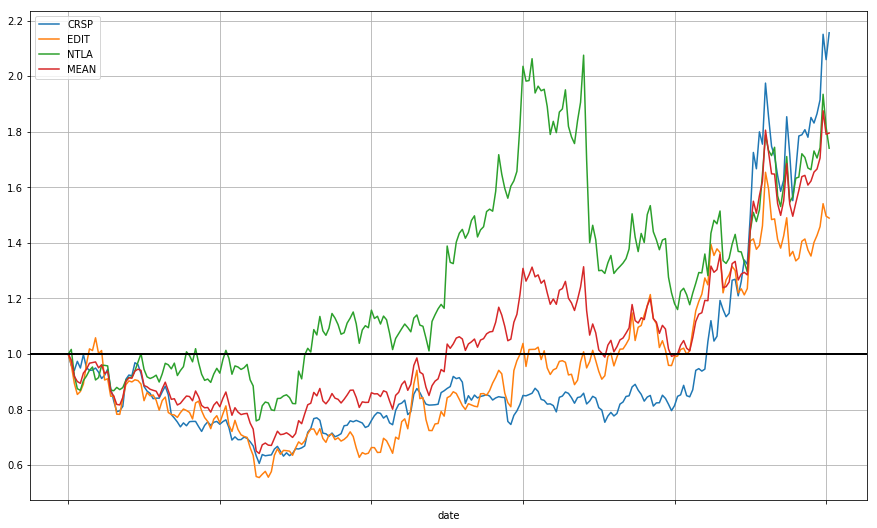

In [4]:
# GENE without sangamo
editas = web.DataReader('EDIT', 'iex', start, end)
intellia = web.DataReader('NTLA', 'iex', start, end)
crispr = web.DataReader('CRSP', 'iex', start, end)

gene_stocks = pd.DataFrame({"EDIT": editas["close"],
                       "NTLA": intellia["close"],
                       "CRSP": crispr["close"]
                       })

gene_stock_return = gene_stocks.apply(lambda x: x / x[0])
gene_stock_return['MEAN'] = gene_stock_return.mean(numeric_only=True, axis=1)
print(DataFrame(gene_stock_return, index=dates))
gene_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

2y
                CRSP      EDIT      NTLA      SGMO      MEAN
2017-03-31  0.968847  0.907317  0.939960  1.106383  0.980627
2017-04-28  0.757454  0.766260  0.971981  1.021277  0.879243
2017-05-31  0.606142  0.555285  0.764510  1.446809  0.843186
2017-06-30  0.712951  0.682114  1.067378  1.872340  1.083696
2017-07-31  0.778371  0.687805  1.123416  1.829787  1.104845
2017-08-31  0.911437  0.858130  1.402935  2.840426  1.503232
2017-09-29  0.795283  0.976016  1.657772  3.191489  1.655140
2017-10-31  0.858923  1.008130  2.076051  2.638298  1.645350
2017-11-30  0.845127  1.173577  1.502335  3.446809  1.741962
2017-12-29  1.044949  1.249187  1.282188  3.489362  1.766421
2018-01-31  1.748109  1.484146  1.714476  4.436170  2.345725
2018-02-28  2.156653  1.489431  1.741161  5.095745  2.620747


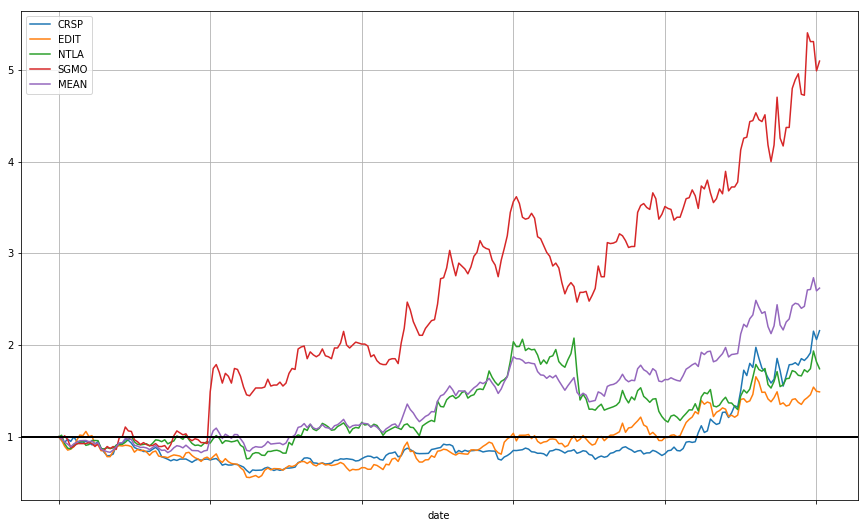

In [5]:
# GENE with sangamo
sangamo = web.DataReader('SGMO', 'iex', start, end)

gene_stocks = pd.DataFrame({"EDIT": editas["close"],
                       "NTLA": intellia["close"],
                       "SGMO": sangamo["close"],
                       "CRSP": crispr["close"]
                       })

gene_stock_return = gene_stocks.apply(lambda x: x / x[0])
gene_stock_return['MEAN'] = gene_stock_return.mean(numeric_only=True, axis=1)
print(DataFrame(gene_stock_return, index=dates))
gene_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

2y
2y
2y
2y
2y
2y
2y
2y
                BABA      BADU       CEO       CHL        JD       LFC  \
2017-03-31  1.036428  0.983973  1.006977  0.990140  1.014346  0.993519   
2017-04-28  1.110150  1.027947  0.976297  0.955898  1.143463  0.984446   
2017-05-31  1.177047  1.061427  0.947802  0.987989  1.305184  1.056384   
2017-06-30  1.354287  1.020133  0.919644  0.951775  1.278774  0.994167   
2017-07-31  1.489331  1.290994  0.945196  0.957870  1.472775  1.029164   
2017-08-31  1.650711  1.300690  1.021686  0.951596  1.366482  1.044718   
2017-09-29  1.660035  1.412707  1.090191  0.906597  1.245517  0.975373   
2017-10-31  1.777105  1.391319  1.149029  0.904446  1.223345  1.080363   
2017-11-30  1.702038  1.360748  1.150206  0.911438  1.221063  1.060272   
2017-12-29  1.657343  1.335824  1.206691  0.906060  1.350505  1.011666   
2018-01-31  1.963572  1.408316  1.321342  0.944066  1.605152  1.086196   
2018-02-28  1.789120  1.439229  1.197781  0.833453  1.537333  0.950097   

             

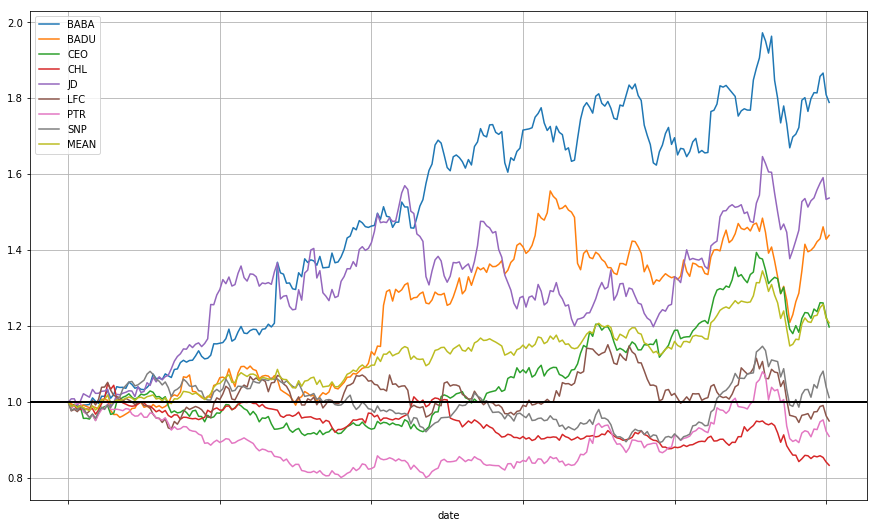

In [6]:
# Chinese
baidu = web.DataReader('BIDU', 'iex', start, end)        # 百度
jingdong = web.DataReader('JD', 'iex', start, end)       # 京东
chinalife = web.DataReader('LFC', 'iex', start, end)     # 中人寿
chinamobile = web.DataReader('CHL', 'iex', start, end)   # 中移动
petrochina = web.DataReader('PTR', 'iex', start, end)    # 中石油
chinapetroleum = web.DataReader('SNP', 'iex', start, end)# 中石化
cnooc = web.DataReader('CEO', 'iex', start, end)         # 中海油
alibaba = web.DataReader('BABA', 'iex', start, end)      # 阿里巴巴

cn_stocks = pd.DataFrame({"BADU": baidu["close"],
                          "JD": jingdong["close"],
                          "LFC": chinalife["close"],
                          "CHL": chinamobile["close"],
                          "PTR": petrochina["close"],
                          "SNP": chinapetroleum["close"],
                          "CEO": cnooc["close"],
                          "BABA": alibaba["close"]})

cn_stock_return = cn_stocks.apply(lambda x: x / x[0])
cn_stock_return['MEAN'] = cn_stock_return.mean(numeric_only=True, axis=1)
print(DataFrame(cn_stock_return, index=dates))
cn_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

2y
2y
2y
2y
2y
2y
2y
                 IBM      INTC      MSFT      NVDA      QCOM      TSLA  \
2017-03-31  0.957076  1.003896  1.014167  1.059733  1.005788  1.113111   
2017-04-28  0.880956  1.006123  1.054204  1.014690  0.942642  1.256180   
2017-05-31  0.838857  1.005010  1.075454  1.404319  1.004561  1.363931   
2017-06-30  0.845452  0.939048  1.061441  1.406362  0.968602  1.446324   
2017-07-31  0.795109  0.987197  1.119495  1.580990  0.932994  1.293776   
2017-08-31  0.786095  0.976065  1.151370  1.648409  0.916857  1.423486   
2017-09-29  0.797362  1.059839  1.147059  1.739177  0.909314  1.364291   
2017-10-31  0.846716  1.266073  1.280875  2.011966  0.894755  1.326014   
2017-11-30  0.846221  1.247982  1.296119  1.952622  1.163655  1.235301   
2017-12-29  0.843199  1.284720  1.317216  1.882479  1.122961  1.245300   
2018-01-31  0.899698  1.339827  1.463043  2.391283  1.197158  1.417127   
2018-02-28  0.856444  1.371834  1.443948  2.354315  1.140151  1.372130   

                

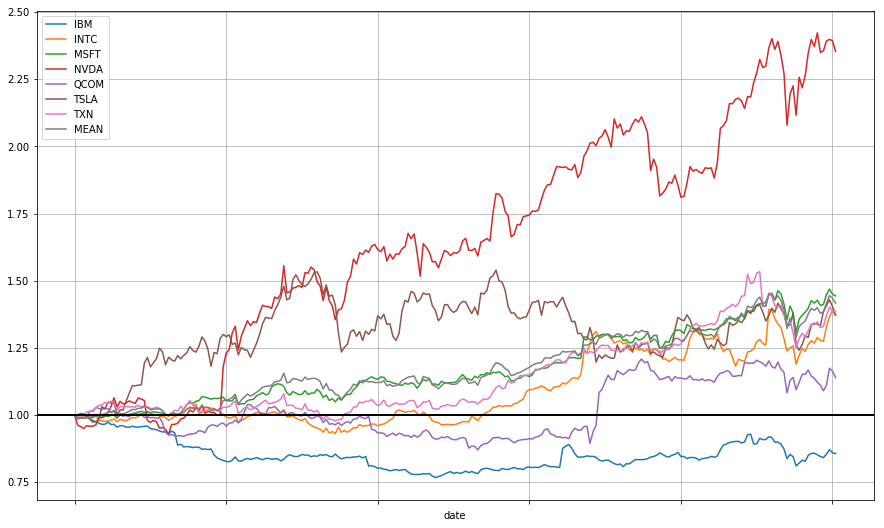

In [7]:
# Popular
microsoft = web.DataReader('MSFT', 'iex', start, end)
ibm = web.DataReader('IBM', 'iex', start, end)
intel = web.DataReader('INTC', 'iex', start, end)
nvidia = web.DataReader('NVDA', 'iex', start, end)
tesla = web.DataReader('TSLA', 'iex', start, end)
ti = web.DataReader('TXN', 'iex', start, end)
qualcomm = web.DataReader('QCOM', 'iex', start, end)

popular_stocks = pd.DataFrame({"MSFT": microsoft["close"],
                       "IBM": ibm["close"],
                       "INTC": intel["close"],
                       "NVDA": nvidia["close"],
                       "TSLA": tesla["close"],
                       "TXN": ti["close"],
                       "QCOM": qualcomm["close"]})

popular_stock_return = popular_stocks.apply(lambda x: x / x[0])
popular_stock_return['MEAN'] = popular_stock_return.mean(numeric_only=True, axis=1)
print(DataFrame(popular_stock_return, index=dates))
popular_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

2y
               BRK.B      MEAN
2017-03-31  0.940208  0.940208
2017-04-28  0.931916  0.931916
2017-05-31  0.932310  0.932310
2017-06-30  0.955381  0.955381
2017-07-31  0.986970  0.986970
2017-08-31  1.021886  1.021886
2017-09-29  1.034070  1.034070
2017-10-31  1.054490  1.054490
2017-11-30  1.088730  1.088730
2017-12-29  1.118118  1.118118
2018-01-31  1.209273  1.209273
2018-02-28  1.168773  1.168773


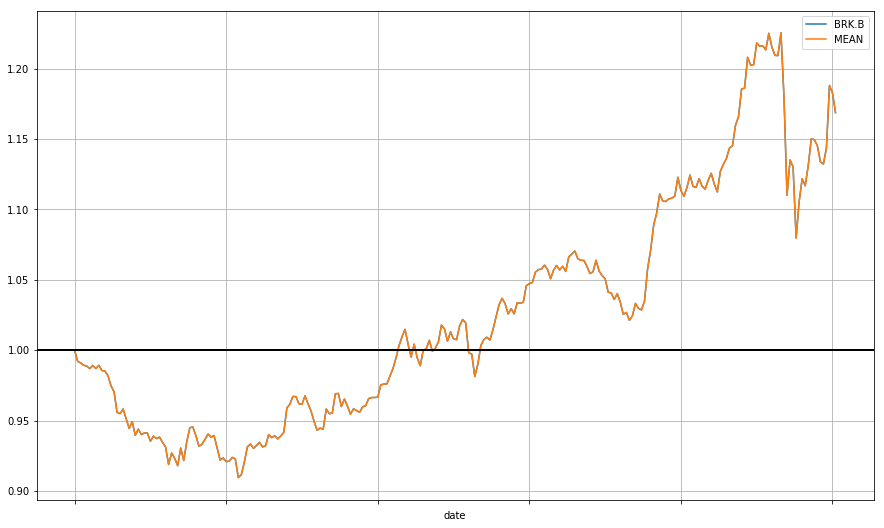

In [8]:
# Other
berkshire = web.DataReader('BRK.B', 'iex', start, end)

other_stocks = pd.DataFrame({"BRK.B": berkshire["close"]})

other_stock_return = other_stocks.apply(lambda x: x / x[0])
other_stock_return['MEAN'] = other_stock_return.mean(numeric_only=True, axis=1)
print(DataFrame(other_stock_return, index=dates))
other_stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)